In [1]:
!pip install deeplabcut

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [5]:
#Setup your project variables:
# PLEASE EDIT THESE:
  
ProjectFolderName = '18mo_ELS_olivia-Olivia-2022-06-09'
VideoType = 'mp4' 
Behavior = 'dlc-models' #name of model folder in the drive
videofile_path = ['/content/drive/MyDrive/ADL Lab Work/18moELSproject/18mo_ELS_olivia-Olivia-2022-06-09/videos'] #Enter the list of videos or folder to analyze.
videofile_path

['/content/drive/MyDrive/ADL Lab Work/18moELSproject/18mo_ELS_olivia-Olivia-2022-06-09/videos']

In [6]:
#GUIs don't work on the cloud, so label your data locally on your computer! This will suppress the GUI support
import os
os.environ["DLClight"]="True"

In [7]:
import deeplabcut

Loading DLC 2.2.1.1...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


In [8]:
deeplabcut.__version__

'2.2.1.1'

In [9]:
#This creates a path variable that links to your google drive copy
#No need to edit this, as you set it up before: 
path_config_file = '/content/drive/MyDrive/ADL Lab Work/18moELSproject/18mo_ELS_olivia-Olivia-2022-06-09/config.yaml'
path_config_file

'/content/drive/MyDrive/ADL Lab Work/18moELSproject/18mo_ELS_olivia-Olivia-2022-06-09/config.yaml'

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from pathlib import Path

In [11]:
# want to generate general plots for 1 run
video='/content/drive/MyDrive/ADL Lab Work/18mo_ELS_olivia-Olivia-2022-06-09/videos/071720_run1.mp4'
DLCscorer='DLC_resnet50_18mo_ELS_oliviaJun9shuffle1_56000'

dataname = '/content/drive/MyDrive/ADL Lab Work/18mo_ELS_olivia-Olivia-2022-06-09/videos/071720_run1DLC_resnet50_18mo_ELS_oliviaJun9shuffle1_56000.h5'

#loading output of DLC
Dataframe = pd.read_hdf(dataname)

In [12]:
Dataframe.head()

scorer    DLC_resnet50_18mo_ELS_oliviaJun9shuffle1_56000              \
bodyparts                                           nose               
coords                                                 x           y   
0                                             984.345703  908.601501   
1                                             978.556274  890.709900   
2                                            1023.071594  871.362610   
3                                             364.694458  187.318298   
4                                             380.276489  204.018661   

scorer                                                               \
bodyparts               tailbase                            tailend   
coords    likelihood           x           y likelihood           x   
0           0.013956  410.189606  253.844482   0.003968  665.601868   
1           0.129780  976.637756  887.154785   0.021837  980.576233   
2           0.002931  964.532288  858.537537   0.001025  968.695557   
3           0.010352  390.599396  209.969315   0.003504  391.038635   
4           0.001117  379.525848  204.529861   0.000617  378.175629   

scorer                                        ...                             \
bodyparts                            leftear  ... rightfrontpaw leftfrontpaw   
coords              y likelihood           x  ...    likelihood            x   
0          262.361084   0.038723  384.384521  ...      0.005294   411.132141   
1          890.483276   0.301929  409.047516  ...      0.019447   980.401184   
2          870.174072   0.018545  402.893219  ...      0.001306   962.950500   
3          206.702866   0.019977  396.621460  ...      0.004212   391.398438   
4          202.431473   0.002982  379.860016  ...      0.001071   381.053711   

scorer                                                                \
bodyparts                        rightbackpaw                          
coords              y likelihood            x           y likelihood   
0          254.289154   0.004083   413.902283  252.770523   0.003974   
1          890.675964   0.018880   979.558350  888.999268   0.018497   
2          857.420410   0.001382   959.937073  861.105530   0.001707   
3          209.317703   0.003193   394.614532  207.248871   0.003421   
4          204.553253   0.001043   383.022919  204.016159   0.001064   

scorer                                        
bodyparts leftbackpaw                         
coords              x           y likelihood  
0          411.891541  252.661926   0.003683  
1          975.998047  888.702271   0.018634  
2          962.220886  862.221436   0.001569  
3          393.948364  207.396500   0.002536  
4          380.547394  201.820862   0.000798  

[5 rows x 27 columns]

In [13]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)

def Histogram(vector,color,bins):
    dvector=numpy.diff(vector)
    dvector=dvector[numpy.isfinite(dvector)]
    plt.hist(dvector,color=color,histtype='step',bins=bins)

def PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,colormap='jet',fs=(4,3)):
    ''' Plots poses vs time; pose x vs pose y; histogram of differences and likelihoods.'''
    plt.figure(figsize=fs)
    colors = get_cmap(len(bodyparts2plot),name = colormap)
    scorer=Dataframe.columns.get_level_values(0)[0] #you can read out the header to get the scorer name!

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Dataframe[scorer][bp]['x'].values[Index],Dataframe[scorer][bp]['y'].values[Index],'.',color=colors(bpindex),alpha=alphavalue)

    plt.gca().invert_yaxis()

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    #plt.savefig(os.path.join(tmpfolder,"trajectory"+suffix))
    plt.figure(figsize=fs)
    Time=numpy.arange(numpy.size(Dataframe[scorer][bodyparts2plot[0]]['x'].values))

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time[Index],Dataframe[scorer][bp]['x'].values[Index],'--',color=colors(bpindex),alpha=alphavalue)
        plt.plot(Time[Index],Dataframe[scorer][bp]['y'].values[Index],'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=(len(bodyparts2plot)-1)))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('X and y-position in pixels')
    #plt.savefig(os.path.join(tmpfolder,"plot"+suffix))
    plt.figure(figsize=fs)
    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values > pcutoff
        plt.plot(Time,Dataframe[scorer][bp]['likelihood'].values,'-',color=colors(bpindex),alpha=alphavalue)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=(len(bodyparts2plot)-1)))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.xlabel('Frame index')
    plt.ylabel('likelihood')

    #plt.savefig(os.path.join(tmpfolder,"plot-likelihood"+suffix))

    plt.figure(figsize=fs)
    bins=numpy.linspace(0,numpy.amax(Dataframe.max()),100)

    for bpindex, bp in enumerate(bodyparts2plot):
        Index=Dataframe[scorer][bp]['likelihood'].values < pcutoff
        X=Dataframe[scorer][bp]['x'].values
        X[Index]=numpy.nan
        Histogram(X,colors(bpindex),bins)
        Y=Dataframe[scorer][bp]['x'].values
        Y[Index]=numpy.nan
        Histogram(Y,colors(bpindex),bins)

    sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(colormap), norm=plt.Normalize(vmin=0, vmax=len(bodyparts2plot)-1))
    sm._A = []
    cbar = plt.colorbar(sm,ticks=range(len(bodyparts2plot)))
    cbar.set_ticklabels(bodyparts2plot)
    plt.ylabel('Count')
    plt.xlabel('DeltaX and DeltaY')
    
    #plt.savefig(os.path.join(tmpfolder,"hist"+suffix))


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

headers = ['midpoint', 'mx', 'my']

df = pd.read_csv('/content/drive/MyDrive/ADL Lab Work/18moELSproject/CSVs/ELS/071720 Run4DLC_resnet50_18mo_ELS_oliviaJun9shuffle1_140000_filtered.csv', names=headers)

df.set_index('Name').plot()

plt.show()

KeyError: ignored

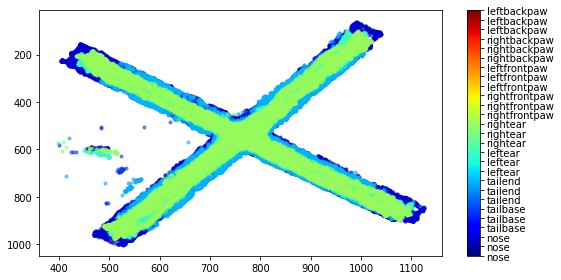

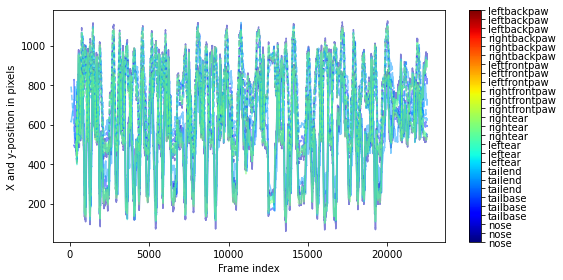

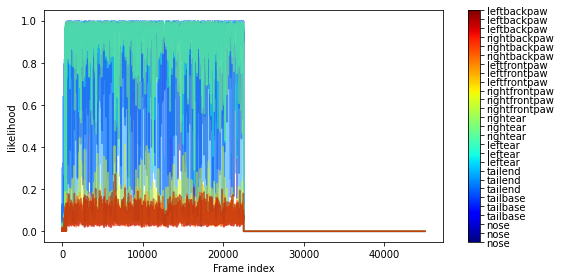

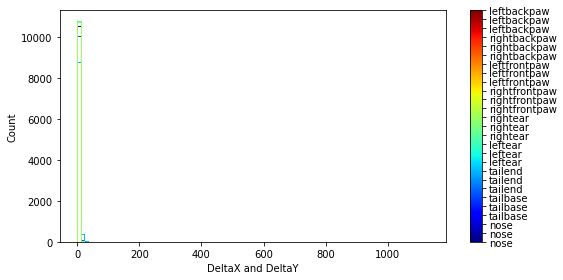

In [15]:

bodyparts=Dataframe.columns.get_level_values(1) #you can read out the header to get body part names!

bodyparts2plot= bodyparts #you could also take a subset, i.e. =['snout']

%matplotlib inline
PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,fs=(8,4))



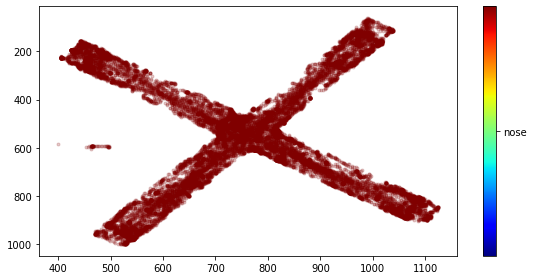

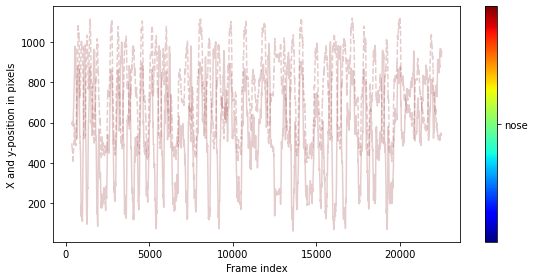

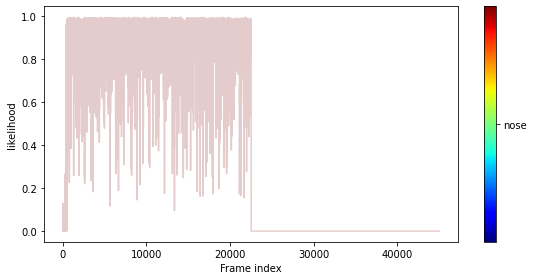

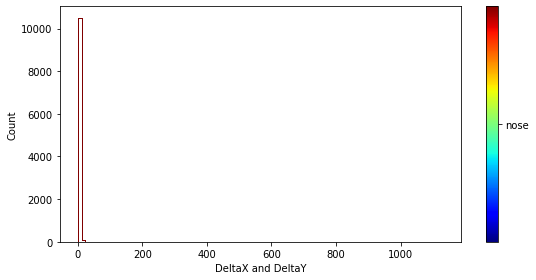

In [16]:
bodyparts=Dataframe.columns.get_level_values(1) #you can read out the header to get body part names!

bodyparts2plot= ['nose'] #you could also take a subset, i.e. =['snout']

%matplotlib inline
PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,fs=(8,4))

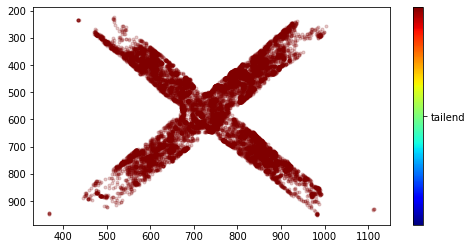

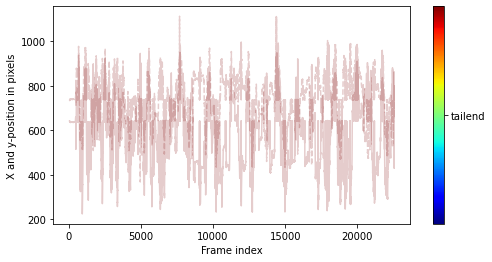

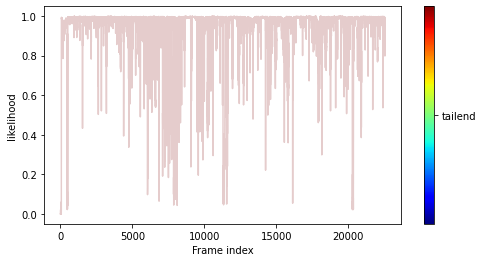

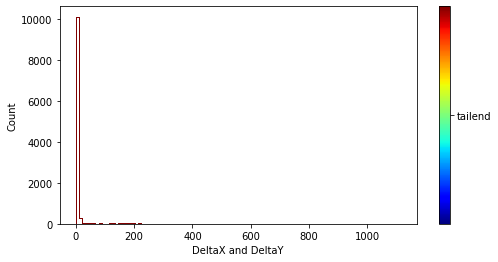

In [ ]:
bodyparts=Dataframe.columns.get_level_values(1) #you can read out the header to get body part names!

bodyparts2plot= ['tailend'] #you could also take a subset, i.e. =['snout']

%matplotlib inline
PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,fs=(8,4))

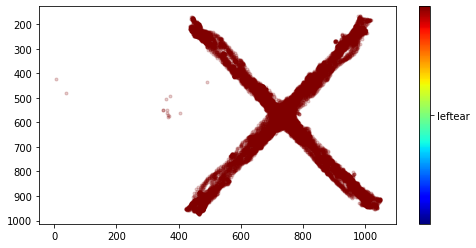

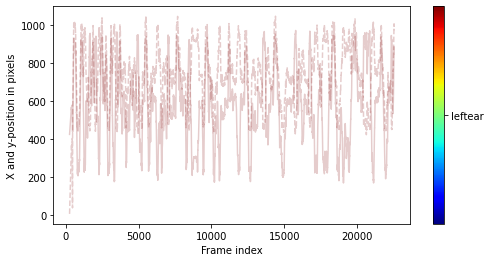

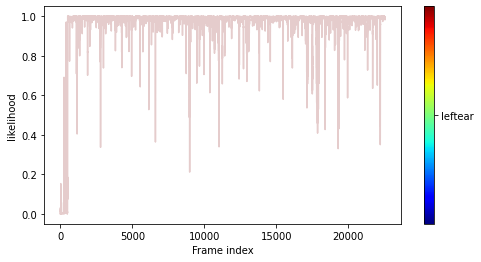

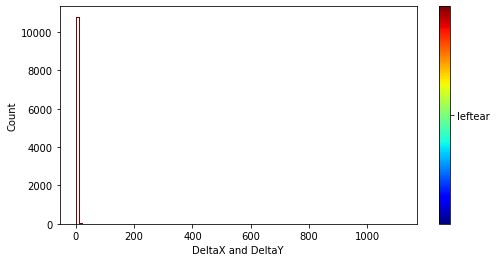

In [ ]:
bodyparts=Dataframe.columns.get_level_values(1) #you can read out the header to get body part names!

bodyparts2plot= ['leftear'] #you could also take a subset, i.e. =['snout']

%matplotlib inline
PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,fs=(8,4))

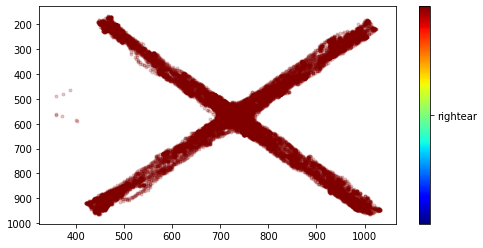

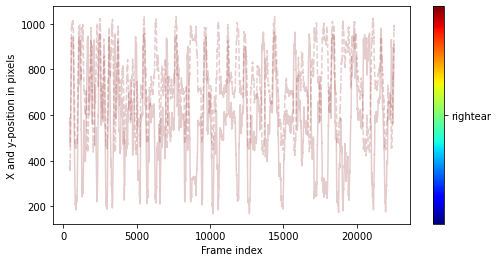

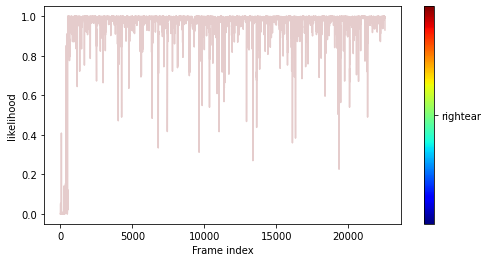

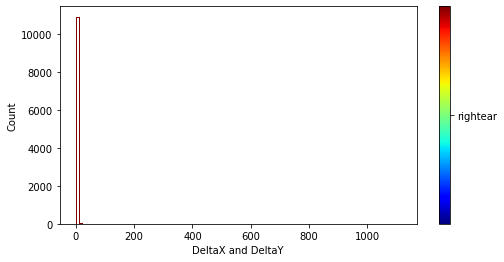

In [ ]:
bodyparts=Dataframe.columns.get_level_values(1) #you can read out the header to get body part names!

bodyparts2plot= ['rightear'] #you could also take a subset, i.e. =['snout']

%matplotlib inline
PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,fs=(8,4))

In [ ]:
bodyparts=Dataframe.columns.get_level_values(1) #you can read out the header to get body part names!

bodyparts2plot= ['midpoint'] #you could also take a subset, i.e. =['snout']

%matplotlib inline
PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,fs=(8,4))

KeyError: ignored

<Figure size 576x288 with 0 Axes>

In [ ]:
bodyparts=Dataframe.columns.get_level_values(1) #you can read out the header to get body part names!

bodyparts2plot= ['leftfrontpaw'] #you could also take a subset, i.e. =['snout']

%matplotlib inline
PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,fs=(8,4))

In [ ]:
bodyparts=Dataframe.columns.get_level_values(1) #you can read out the header to get body part names!

bodyparts2plot= ['leftbackpaw'] #you could also take a subset, i.e. =['snout']

%matplotlib inline
PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,fs=(8,4))

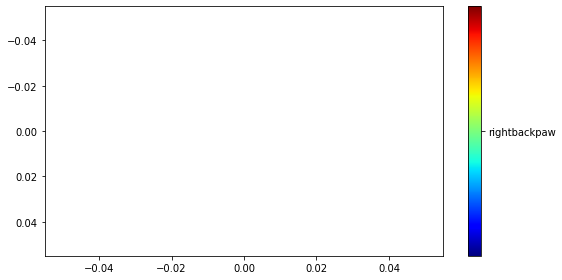

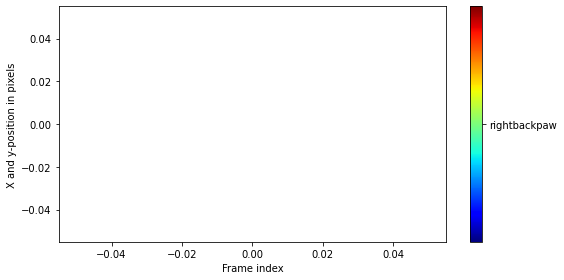

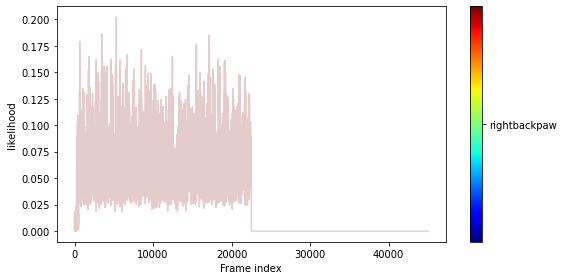

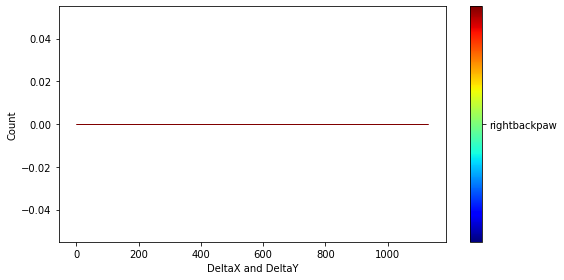

In [17]:
bodyparts=Dataframe.columns.get_level_values(1) #you can read out the header to get body part names!

bodyparts2plot= ['rightbackpaw'] #you could also take a subset, i.e. =['snout']

%matplotlib inline
PlottingResults(Dataframe,bodyparts2plot,alphavalue=.2,pcutoff=.5,fs=(8,4))

In [ ]:
# want to load all data / see how to
video='071720_run1.mp4'
DLCscorer='DLC_resnet50_18mo_ELS_oliviaJun9shuffle1_56000'

dataname = '/content/drive/MyDrive/ADL Lab Work/18mo_ELS_olivia-Olivia-2022-06-09/videos/071720_run1DLC_resnet50_18mo_ELS_oliviaJun9shuffle1_56000.h5'

#loading output of DLC
Dataframe = pd.read_hdf(dataname)

In [ ]:
# want to create folders of the metadata

import shutil, os
from pathlib import Path


src = '/content/drive/MyDrive/ADL Lab Work/18mo_ELS_olivia-Olivia-2022-06-09/videos' 
trg = '/content/drive/MyDrive/ADL Lab Work/18moELSproject/All CSVs'

files=os.listdir(src)
FileType = 'csv'

# iterating over all the files in
# the source directory
#for fname in files:
     
    # copying the files to the
    # destination directory
    #shutil.copy2(os.path.join(src,fname), trg)





In [ ]:
import os
import shutil

def selective_copy(source_dir, target_dir, file_extension):
   if not os.path.exists(target_dir):
      os.makedirs(target_dir)

   for item in os.listdir(source_dir):
      source_fn = os.path.join(source_dir, item)
      if os.path.isdir(source_fn):
         selective_copy(source_fn, os.path.join(target_dir, item), file_extension)
      elif item.endswith(file_extension):
         shutil.copyfile(source_fn, os.path.join(target_dir, item))

In [ ]:
import numpy as np
from collections import namedtuple
from scipy.spatial import distance
import pandas as pd
import warnings

"""
    Functions to extract time spent by the mouse in each of a list of user defined ROIS 

    Contributed by Federico Claudi
    https://github.com/FedeClaudi

    Example usage:
    rois        -->  a dictionary with name and position of each roi
    tracking    -->  a pandas dataframe with X,Y,Velocity for each bodypart
    bodyparts   -->  a list with the name of all the bodyparts
    
    -----------------------------------------------------------------------------------

    results = {}
    for bp in bodyparts:
        bp_tracking = np.array((tracking.bp.x.values, tracking.bp.y.values, tracking.bp.Velocity.values))
        res = get_timeinrois_stats(bp_tracking, roi, fps=30)
        results[bp] = res
    
    ------------------------------------------------------------------------------------

    if Velocity is not know, it can be calculated using "calc_distance_between_points_in_a_vector_2d":
        vel = calc_distance_between_points_in_a_vector_2d(np.array(tracking.bp.x.values, tracking.bp.y.values))

    which returns a 1d vector with the velocity in pixels/frame [effectively the number pixels a tracked point moved
    from one frame to the next]

"""

def calc_distance_between_points_in_a_vector_2d(v1):
    '''calc_distance_between_points_in_a_vector_2d [for each consecutive pair of points, p1-p2, in a vector, get euclidian distance]

    This function can be used to calculate the velocity in pixel/frame from tracking data (X,Y coordinates)
    
    Arguments:
        v1 {[np.array]} -- [2d array, X,Y position at various timepoints]
    
    Raises:
        ValueError
    
    Returns:
        [np.array] -- [1d array with distance at each timepoint]

    >>> v1 = [0, 10, 25, 50, 100]
    >>> d = calc_distance_between_points_in_a_vector_2d(v1)
    '''
    # Check data format
    if isinstance(v1, dict) or not np.any(v1) or v1 is None:
            raise ValueError(
                'Feature not implemented: cant handle with data format passed to this function')

    # If pandas series were passed, try to get numpy arrays
    try:
        v1, v2 = v1.values, v2.values
    except:  # all good
        pass
    # loop over each pair of points and extract distances
    dist = []
    for n, pos in enumerate(v1):
        # Get a pair of points
        if n == 0:  # get the position at time 0, velocity is 0
            p0 = pos
            dist.append(0)
        else:
            p1 = pos  # get position at current frame

            # Calc distance
            dist.append(np.abs(distance.euclidean(p0, p1)))

            # Prepare for next iteration, current position becomes the old one and repeat
            p0 = p1

    return np.array(dist)


def get_roi_at_each_frame(bp_data, rois, check_inroi):
    """
    Given position data for a bodypart and the position of a list of rois, this function calculates which roi is
    the closest to the bodypart at each frame
    :param bp_data: numpy array: [nframes, 3] -> X,Y,Speed position of bodypart at each frame
                    [as extracted by DeepLabCut] --> df.bodypart.values. 
    :param rois: dictionary with the position of each roi. The position is stored in a named tuple with the location of
                    two points defyining the roi: topleft(X,Y) and bottomright(X,Y).
    :param check_inroi: boolean, default True. If true only counts frames in which the tracked point is inside of a ROI. 
                Otherwise at each frame it counts the closest ROI.
    :return: tuple, closest roi to the bodypart at each frame
    """

    def sort_roi_points(roi):
        return np.sort([roi.topleft[0], roi.bottomright[0]]), np.sort([roi.topleft[1], roi.bottomright[1]])

    if not isinstance(rois, dict): raise ValueError('rois locations should be passed as a dictionary')

    if not isinstance(bp_data, np.ndarray):
        if not isinstance(bp_data, tuple): raise ValueError('Unrecognised data format for bp tracking data')
        else:
            pos = np.zeros((len(bp_data.x), 2))
            pos[:, 0], pos[:, 1] = bp_data.x, bp_data.y
            bp_data = pos

    # Get the center of each roi
    centers = []
    for points in rois.values():
        center_x = (points.topleft[0] + points.bottomright[0]) / 2
        center_y = (points.topleft[1] + points.bottomright[1]) / 2
        center = np.asarray([center_x, center_y])
        centers.append(center)

    roi_names = list(rois.keys())

    # Calc distance to each roi for each frame
    data_length = bp_data.shape[0]
    distances = np.zeros((data_length, len(centers)))
    for idx, center in enumerate(centers):
        cnt = np.tile(center, data_length).reshape((data_length, 2))
        
        dist = np.hypot(np.subtract(cnt[:, 0], bp_data[:, 0]), np.subtract(cnt[:, 1], bp_data[:, 1]))
        distances[:, idx] = dist

    # Get which roi is closest at each frame
    sel_rois = np.argmin(distances, 1)
    roi_at_each_frame = tuple([roi_names[x] for x in sel_rois])

    # Check if the tracked point is actually in the closest ROI
    if not check_inroi: 
        cleaned_rois = []
        for i, roi in enumerate(roi_at_each_frame):
            x,y = bp_data[i, 0], bp_data[i, 1]
            X, Y = sort_roi_points(rois[roi]) # get x,y coordinates of roi points
            if not X[0] <= x <= X[1] or not Y[0] <= y <= Y[1]:
                cleaned_rois.append('none')
            else:
                cleaned_rois.append(roi)
        return cleaned_rois
    else:
        warnings.warn("Warning: you've set check_inroi=False, so data reflect which ROI is closest even if tracked point is not in any given ROI.")
        return roi_at_each_frame


def get_timeinrois_stats(data, rois, fps=None, returndf=False, check_inroi=True):
    """
    Quantify number of times the animal enters a roi, cumulative number of frames spend there, cumulative time in seconds
    spent in the roi and average velocity while in the roi.
    In which roi the mouse is at a given frame is determined with --> get_roi_at_each_frame()
    Quantify the ammount of time in each  roi and the avg stay in each roi
    :param data: trackind data is a numpy array with shape (n_frames, 3) with data for X,Y position and Speed. If [n_frames, 2]
                array is passed, speed is calculated automatically.
    :param rois: dictionary with the position of each roi. The position is stored in a named tuple with the location of
                two points defyining the roi: topleft(X,Y) and bottomright(X,Y).
    :param fps: framerate at which video was acquired
    :param returndf: boolean, default False. If true data are returned as a DataFrame instead of dict.
    :param check_inroi: boolean, default True. If true only counts frames in which the tracked point is inside of a ROI. 
                Otherwise at each frame it counts the closest ROI.

    :return: dictionary or dataframe

    # Testing
    >>> position = namedtuple('position', ['topleft', 'bottomright'])
    >>> rois = {'middle': position((300, 400), (500, 800))}
    >>> data = np.zeros((23188, 3))
    >>> res = get_timeinrois_stats(data, rois, fps=30)
    >>> print(res)

    """

    def get_indexes(lst, match):
        return np.asarray([i for i, x in enumerate(lst) if x == match])

    # Check arguments
    if data.shape[1] == 2:  # only X and Y tracking data passed, calculate speed
        speed = calc_distance_between_points_in_a_vector_2d(data)
        data = np.hstack((data, speed.reshape((len(speed), 1))))

    elif data.shape[1] != 3:
        raise ValueError("Tracking data should be passed as either an Nx2 or Nx3 array. Tracking data shape was: {}. Maybe you forgot to transpose the data?".format(data.shape))

    roi_names = [k.lower() for k in list(rois.keys())]
    if "none" in roi_names:
        raise ValueError("No roi can have name 'none', that's reserved for the code to use, please use a different name for your rois.")

    if "tot" in roi_names:
        raise ValueError("No roi can have name 'tot', that's reserved for the code to use, please use a different name for your rois.")

    # get roi at each frame of data
    data_rois = get_roi_at_each_frame(data, rois, check_inroi)
    data_time_inrois = {name: data_rois.count(name) for name in set(data_rois)}  # total time (frames) in each roi

    # number of enters in each roi
    transitions = [n for i, n in enumerate(list(data_rois)) if i == 0 or n != list(data_rois)[i - 1]]
    transitions_count = {name: transitions.count(name) for name in transitions}

    # avg time spend in each roi (frames)
    avg_time_in_roi = {transits[0]: time / transits[1]
                       for transits, time in zip(transitions_count.items(), data_time_inrois.values())}

    # avg time spend in each roi (seconds)
    if fps is not None:
        data_time_inrois_sec = {name: t / fps for name, t in data_time_inrois.items()}
        avg_time_in_roi_sec = {name: t / fps for name, t in avg_time_in_roi.items()}
    else:
        data_time_inrois_sec, avg_time_in_roi_sec = None, None

    # get avg velocity in each roi
    avg_vel_per_roi = {}
    for name in set(data_rois):
        indexes = get_indexes(data_rois, name)
        vels = data[indexes, 2]
        avg_vel_per_roi[name] = np.average(np.asarray(vels))

    # get comulative
    transitions_count['tot'] = np.sum(list(transitions_count.values()))
    data_time_inrois['tot'] = np.sum(list(data_time_inrois.values()))
    data_time_inrois_sec['tot'] = np.sum(list(data_time_inrois_sec.values()))
    avg_time_in_roi['tot'] = np.sum(list(avg_time_in_roi.values()))
    avg_time_in_roi_sec['tot'] = np.sum(list(avg_time_in_roi_sec.values()))
    avg_vel_per_roi['tot'] = np.sum(list(avg_vel_per_roi.values()))

    if returndf:
        roinames = sorted(list(data_time_inrois.keys()))
        results = pd.DataFrame.from_dict({
                    "ROI_name": roinames, 
                    "transitions_per_roi": [transitions_count[r] for r in roinames],
                    "cumulative_time_in_roi": [data_time_inrois[r] for r in roinames],
                    "cumulative_time_in_roi_sec": [data_time_inrois_sec[r] for r in roinames],
                    "avg_time_in_roi": [avg_time_in_roi[r] for r in roinames],
                    "avg_time_in_roi_sec": [avg_time_in_roi_sec[r] for r in roinames],
                    "avg_vel_in_roi": [avg_vel_per_roi[r] for r in roinames],
                    })
    else:
        results = dict(transitions_per_roi=transitions_count,
                cumulative_time_in_roi=data_time_inrois,
                cumulative_time_in_roi_sec=data_time_inrois_sec,
                avg_time_in_roi=avg_time_in_roi,
                avg_time_in_roi_sec=avg_time_in_roi_sec,
                avg_vel_in_roi=avg_vel_per_roi)

    return results


if __name__ == "__main__":
    import doctest
    doctest.testmod(verbose=True)
